<a href="https://colab.research.google.com/github/vicaleram/DSPS_VRamirez/blob/master/DSPS_HW2_2_Victor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS 2019

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [44]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use 

In [0]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which mean to give it

In [0]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](https://github.com/fedhere/DSPS/blob/master/HW2/chisq1.png?raw=1)

![2](https://github.com/fedhere/DSPS/blob/master/HW2/chisq2.png?raw=1)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [0]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

Text(0.5, 1.0, 'Chi Squared distribution')

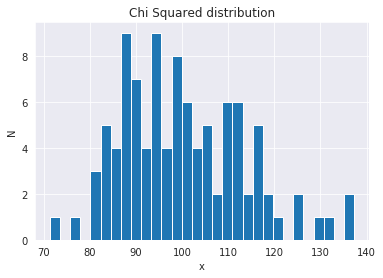

In [48]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456)
md = {}
# md is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
md['chisq'] = np.random.chisquare(mymean, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Chi Squared distribution')

**Figure 1:** Chi squared distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom. 

## let numpy calculate what the mean and stdev of this distribution are

In [49]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.09, standard deviation: 13.24


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we will discuss in class)

In [50]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
#mysize = 1000 / (np.array(range(1, 100) + [10]))
#mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (100,)


Text(0.5, 1.0, 'Size of the array vs. the number of Chi squared distributions')

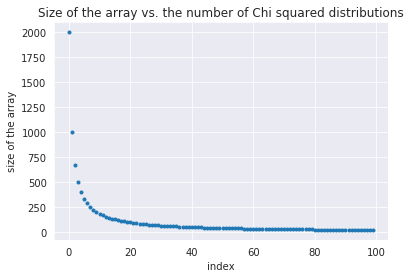

In [51]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")
pl.title('Size of the array vs. the number of Chi squared distributions')

**Figure 2**: The graph shows the number of Chi squared distributions and their respective sizes. There are only a few of the distributions that are of very large size, while most of the distributions have a size of less than 500.

Text(1259.3999999999999, 100, 'expected mean')

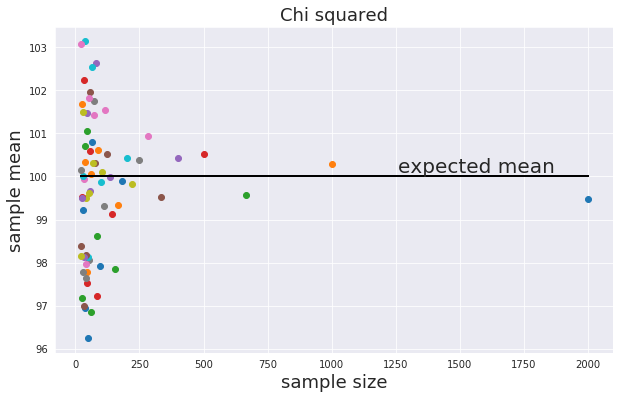

In [56]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 3:** The graph shows that for small sample sizes the mean calculated for the different chi squared distributions is further away from the expected mean, while as the sample value increases the mean gets closer to the expected value. This behavior is due to Law of Large Numbers, which stablishes that the average of the results obtained from many trials should be close to the expected value and will tend to become closer as more trials are performed. The reason there's a higher number of distributions in the left side of the graph is because when we defined mysize, most of the distributions have a small size, causing for their mean to not correlate with our expected mean.


# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0.5, 1.0, 'Histogram of the mean of all samples')

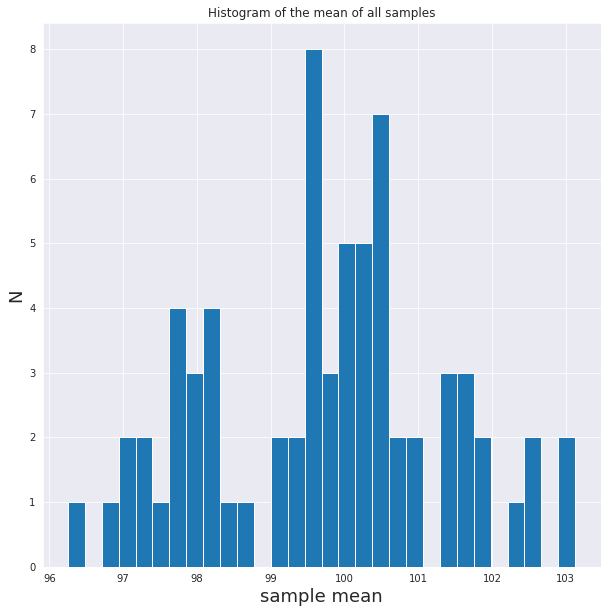

In [57]:
allmeans1 = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans1,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Histogram of the mean of all samples')

**Figure 4:** The histogram shows the number of distributions depending of the sample mean calculated for them. The highest bar is very close to a value of a mean of 100, which is what we set up as the mean of our Chi squared distribution; even though there are some outliers most of the means of the distributions agree with the expected mean.

# Do it for the Normal distribution


Normal mean: 100.14, standard deviation: 0.92


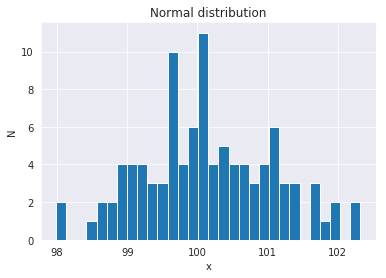

In [58]:
distributions = ['lnorm']
mymean = 100
df = mymean
ldn= {}
np.random.seed(456)
ldn['lnorm'] = np.random.normal(mymean,size=100)

pl.hist(ldn['lnorm'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');
pl.title('Normal distribution')

print ("Normal mean: %.2f, standard deviation: %.2f"%(ldn['lnorm'].mean(), ldn['lnorm'].std()))

**Figure 5:** Normal distribution of a sample of size 100 for a Normal distribution.

shape of the 'size' list that contains the size of each distribution (100,)


Text(1259.3999999999999, 100, 'expected mean')

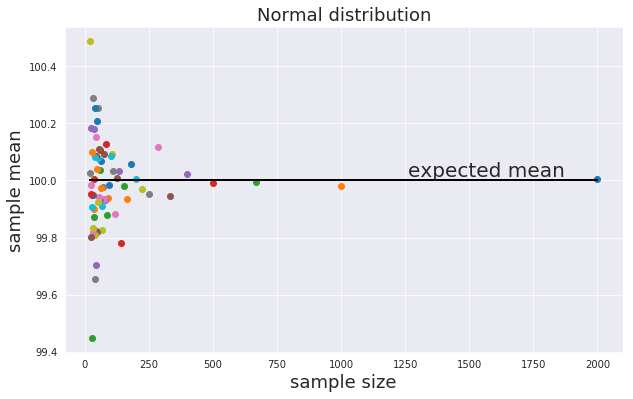

In [59]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

ldn['lnorm'] = {} 

for n in mysize:
    ldn['lnorm'][n] = np.random.normal(df, size = n)
    

ldn['lnorm']['means'] = {}
axlnormq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in ldn['lnorm']:
    if not type(nn) == str:
        ldn['lnorm']['means'][nn] = ldn['lnorm'][nn].mean()

        axlnormq_mu_n.plot(nn, ldn['lnorm']['means'][nn], 'o')
        axlnormq_mu_n.set_xlabel('sample size', fontsize=18)
        axlnormq_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnormq_mu_n.set_title('Normal distribution', fontsize=18)
        axlnormq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axlnormq_mu_n.text(axlnormq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 6:** The graph shows a very similar behavior as the Chi squared scatter graph. The larger the sample size the closer the sample mean will be to the expected mean of 100. However, in this case the values are very close to 100, since the values of the sample mean go between 99.4 and 100.4, while in the Chi squared the range was between 96 and 103.

Text(0.5, 1.0, 'Histogram of the mean of all samples')

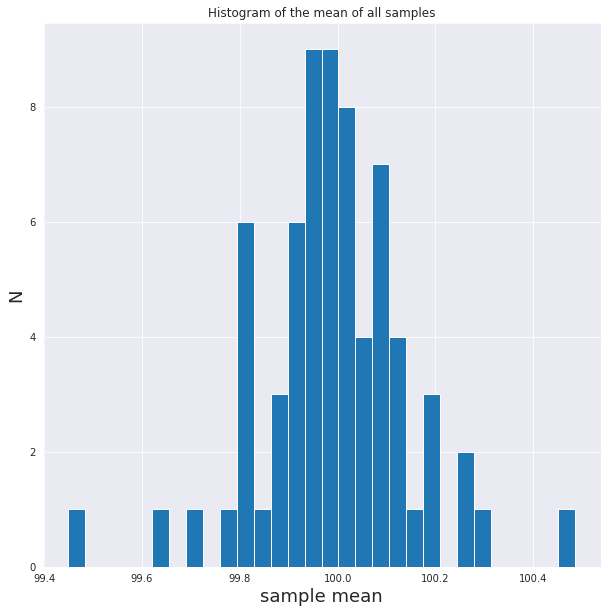

In [60]:
allmeans2 = list(ldn['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans2,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Histogram of the mean of all samples')

**Figure 7:** The histogram shows that the trend of distributions with a sample mean of about a 100 hundred is very significant. Besides, the range of values of the outliers is only a few decimal places further than a 100 and there is just a few of distributions on the edges of the histogram. The normal distributions get closer to the expected mean than the Chi squared distributions.

# Do it for the Poisson distribution

Poisson mean: 99.90, standard deviation: 10.46


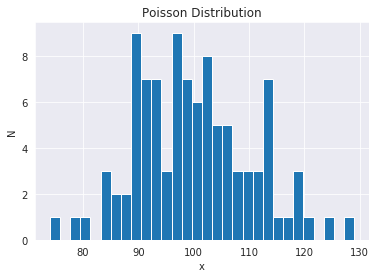

In [62]:
distributions = ['pois']
mymean = 100
df = mymean
poi= {}
np.random.seed(456)
poi['pois'] = np.random.poisson(mymean, size=100)

pl.hist(poi['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');
pl.title('Poisson Distribution')
print ("Poisson mean: %.2f, standard deviation: %.2f"%(poi['pois'].mean(), poi['pois'].std()))

**Figure 8:** Poisson distribution of a sample of size 100.

shape of the 'size' list that contains the size of each distribution (100,)


Text(1259.3999999999999, 100, 'expected mean')

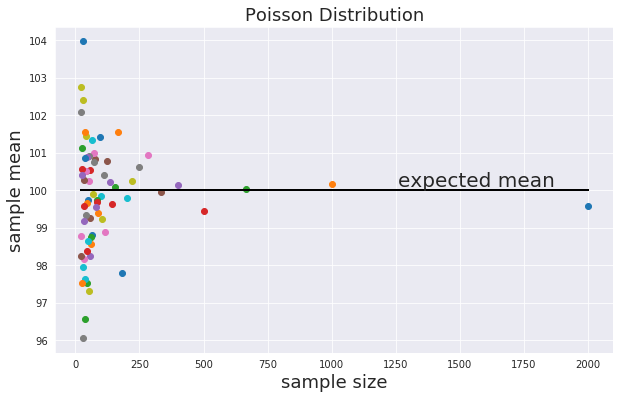

In [66]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)


poi['pois'] = {} 

for n in mysize:
    poi['pois'][n] = np.random.poisson(df, size = n)
    

poi['pois']['means'] = {}
axpoiss_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in poi['pois']:
    if not type(nn) == str:
        poi['pois']['means'][nn] = poi['pois'][nn].mean()

        axpoiss_mu_n.plot(nn, poi['pois']['means'][nn], 'o')
        axpoiss_mu_n.set_xlabel('sample size', fontsize=18)
        axpoiss_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoiss_mu_n.set_title('Poisson Distribution', fontsize=18)
        axpoiss_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axpoiss_mu_n.text(axpoiss_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 9:** The scatter graph shows the same behavior as the other 2 distributions with the sample mean getting closer to the expected mean as the sample size increases. There also appears to be a trend towards values higher than 100 in the smaller size distributions because a lot of values seem to be above the expected mean line. The normal distribution has a range of values of the sample mean very similar to the Chi squared distribution, with values between 96 and 104.

Text(0.5, 1.0, 'Histogram of the mean of all samples')

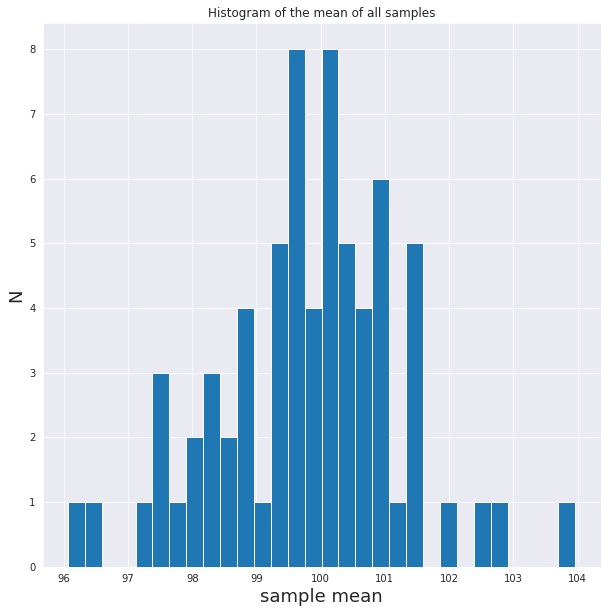

In [67]:
allmeans3 = list(poi['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans3,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Histogram of the mean of all samples')

**Figure 10:** The Normal's histogram seems to be wider in the range of values between 99 and 101.5, meaning that it doesn't have a lot of distributions with the same value, unlike the Poisson distribution that had a large number of distributions in a single bin. Instead, most of the distributions are within the range of 99 and 101.5, with the outliers not being as significant as in the chi squared distribution. Also, the histogram confirms the result from the scatter plot that there are more distributions located where the sample mean is higher than 100.

# Do it for the Binomial distribution

Binomial mean: 100.43, standard deviation: 6.80


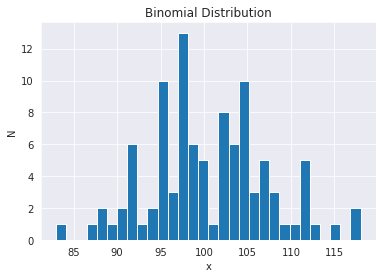

In [68]:
distributions= ['binomial']
m = 200
df = m
import numpy as np
np.random.seed(456)
bi= {}

bi['binomial'] = np.random.binomial(m, 0.5, size=100)
pl.hist(bi['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');
pl.title('Binomial Distribution')
print ("Binomial mean: %.2f, standard deviation: %.2f"%(bi['binomial'].mean(), bi['binomial'].std()))

**Figure 11:** Binomial distribution of a sample of size of 200.

shape of the 'size' list that contains the size of each distribution (100,)


Text(1259.3999999999999, 100, 'expected mean')

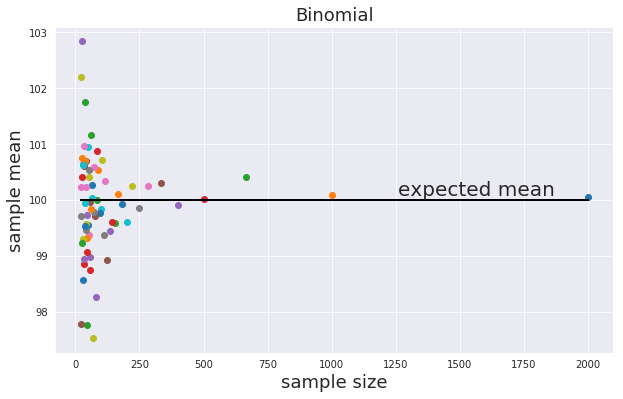

In [70]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

bi['binomial'] = {} 

for n in mysize:
    bi['binomial'][n] = np.random.binomial(df, 0.5 , size = n)
    

bi['binomial']['means'] = {}
axbinom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in bi['binomial']:
    if not type(nn) == str:
        bi['binomial']['means'][nn] = bi['binomial'][nn].mean()

        axbinom_mu_n.plot(nn,bi['binomial']['means'][nn], 'o')
        axbinom_mu_n.set_xlabel('sample size', fontsize=18)
        axbinom_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinom_mu_n.set_title('Binomial', fontsize=18)
        axbinom_mu_n.plot([min(mysize), max(mysize)], [100, 100], 'k')
axbinom_mu_n.text(axbinom_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 12:** The scatter plot follows the behavior of the Law of Large Numbers. In terms of how close are the sample means to the expected value, the Binomial distribution is a bit closer to the expected mean than the Poisson and the Chi Squared distributions, since the sample mean range is in between 97 and 103, but is not as close as the Normal distribution.

Text(0.5, 1.0, 'Histogram of the mean of all samples')

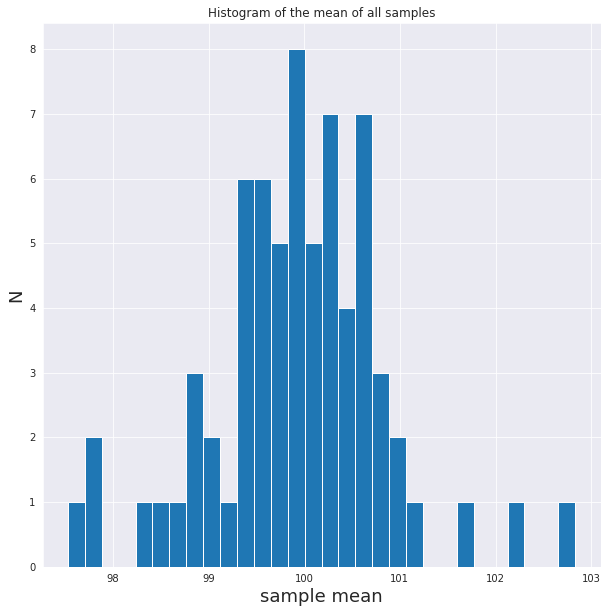

In [74]:
allmeans4 = list(bi['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans4,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Histogram of the mean of all samples')

**Figure 13:** The Binomial histogram's shows that most of the distributions are within the range of about 99.2 to 100.6. The figure shows a wide middle point, where the highest bin is, while to the sides the sample means higher than 101 and lower than 99, have a few distributions. The binomial distribution appears to be very effective in getting most on the distributions closer to the expected mean of a 100.

# Do it for another distribution

Gamma mean: 100.08, standard deviation: 9.32


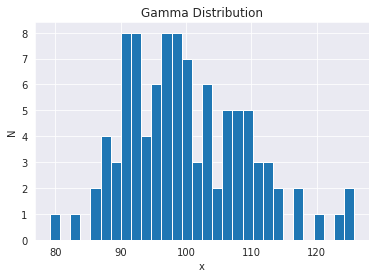

In [76]:
distributions = ['gamma']
mymean = 100
df = mymean
gam= {}
np.random.seed(456)
gam['gamma'] = np.random.gamma(df, 1, size=100)

pl.hist(gam['gamma'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Gamma Distribution')
print ("Gamma mean: %.2f, standard deviation: %.2f"%(gam['gamma'].mean(), gam['gamma'].std()))


**Figure 14:** Gamma distribution of a sample of size 100.

shape of the 'size' list that contains the size of each distribution (100,)


Text(1259.3999999999999, 100, 'expected mean')

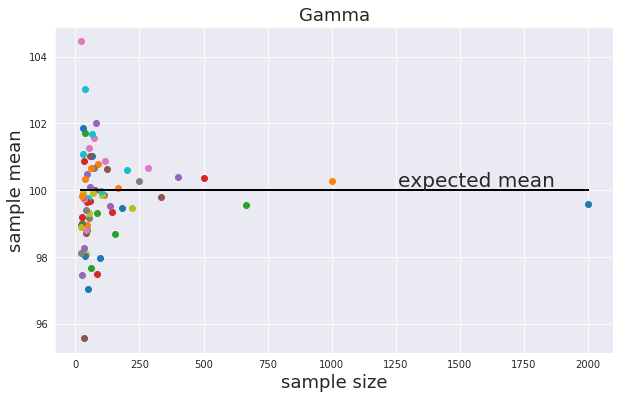

In [79]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

gam['gamma'] = {} 

for n in mysize:
    gam['gamma'][n] = np.random.np.random.gamma(df,1,size=n)
    

gam['gamma']['means'] = {}
axgamm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in gam['gamma']:
    if not type(nn) == str:
        gam['gamma']['means'][nn] = gam['gamma'][nn].mean()

        axgamm_mu_n.plot(nn,gam['gamma']['means'][nn], 'o')
        axgamm_mu_n.set_xlabel('sample size', fontsize=18)
        axgamm_mu_n.set_ylabel('sample mean', fontsize=18)
        axgamm_mu_n.set_title('Gamma', fontsize=18)
        axgamm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axgamm_mu_n.text(axgamm_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 15:** The scatter plot for the Gamma distribution also follows the Law of Large Numbers, as well as it shows that there appears to be a large amount of the small size distributions with mean values close to the expected mean. However, the values are not as close to the expected mean as the normal and binomial distributions.

Text(0.5, 1.0, 'Histogram of the mean of all samples')

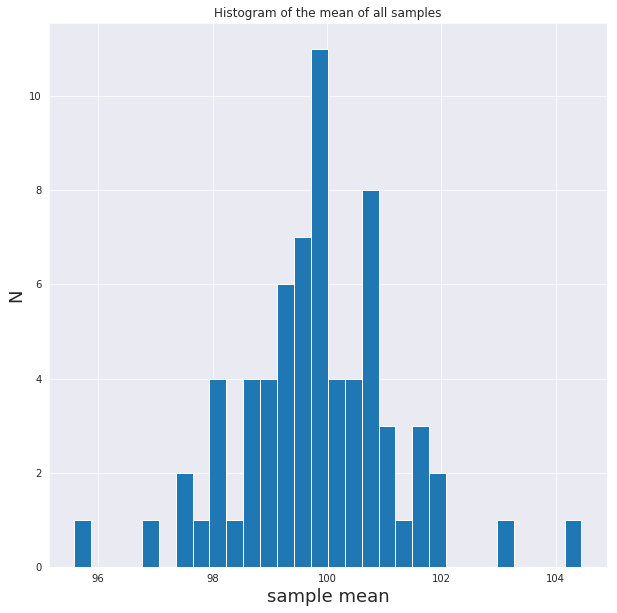

In [80]:
allmeans5 = list(gam['gamma']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans5,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Histogram of the mean of all samples')

**Figure 16:** The histogram shows that there is a single bin with a value of 11 distributions, while the rest of the bins don't get to such high values. The trend of where most of the distriutions' sample mean are is within 101 and 99, being close to the expected mean. In this case there are very few distributions higher than 101 or lower than 99, which correlates to the result of the scatter plot for the gamma distribution that showed that most of the distributions are close to the expected mean line. 